In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
class_names = ['oiseau', 'chat', 'cerf', 
               'chien', 'grenouille', 'cheval']

(x_train, y_train), (x_final, y_final) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_final = x_final.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_final = to_categorical(y_final)

animal_indices = np.where(np.isin(y_train.argmax(axis=1), [2, 3, 4, 5, 6, 7]))[0]
x_animals = x_train[animal_indices]
y_animals = y_train[animal_indices]

In [3]:
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dense(200000, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

inputs = Input(shape=(32, 32, 3))

x = Flatten()(inputs)
 
x = (BatchNormalization())(x)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)
 
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                             

In [4]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
history = model.fit(x_animals, y_animals, batch_size = 32, epochs = 100, shuffle = True)

Epoch 1/100
938/938 [==============================] - 12s 13ms/step - loss: 0.8762 - accuracy: 0.6740
Epoch 2/100
938/938 [==============================] - 12s 13ms/step - loss: 0.8318 - accuracy: 0.6912
Epoch 3/100
938/938 [==============================] - 12s 13ms/step - loss: 0.7921 - accuracy: 0.7042
Epoch 4/100
938/938 [==============================] - 12s 13ms/step - loss: 0.7639 - accuracy: 0.7170
Epoch 5/100
938/938 [==============================] - 12s 13ms/step - loss: 0.7182 - accuracy: 0.7323
Epoch 6/100
938/938 [==============================] - 12s 13ms/step - loss: 0.6925 - accuracy: 0.7439
Epoch 7/100
938/938 [==============================] - 12s 13ms/step - loss: 0.6590 - accuracy: 0.7583
Epoch 8/100
938/938 [==============================] - 12s 13ms/step - loss: 0.6258 - accuracy: 0.7709
Epoch 9/100
938/938 [==============================] - 12s 13ms/step - loss: 0.6054 - accuracy: 0.7763
Epoch 10/100
938/938 [==============================] - 12s 13ms/step - l

938/938 [==============================] - 13s 14ms/step - loss: 0.1735 - accuracy: 0.9395
Epoch 80/100
938/938 [==============================] - 9s 10ms/step - loss: 0.1723 - accuracy: 0.9390
Epoch 81/100
938/938 [==============================] - 13s 14ms/step - loss: 0.1574 - accuracy: 0.9446
Epoch 82/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1846 - accuracy: 0.9354
Epoch 83/100
938/938 [==============================] - 12s 13ms/step - loss: 0.1634 - accuracy: 0.9427
Epoch 84/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1673 - accuracy: 0.9420
Epoch 85/100
938/938 [==============================] - 12s 13ms/step - loss: 0.1669 - accuracy: 0.9407
Epoch 86/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1675 - accuracy: 0.9422
Epoch 87/100
938/938 [==============================] - 13s 13ms/step - loss: 0.1613 - accuracy: 0.9449
Epoch 88/100
938/938 [==============================] - 12s 13ms/step - loss: 

In [9]:
loss, accuracy = model.evaluate(x_final, y_final)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 43.7376 - accuracy: 0.2983
Test loss: 43.73759460449219
Test accuracy: 0.29829999804496765


Text(0, 0.5, 'Accuracy + loss')

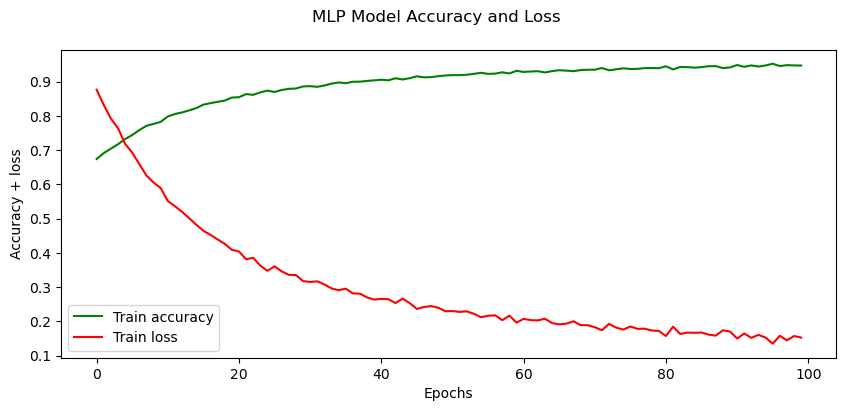

In [10]:
fig, (ax1) = plt.subplots(1, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="Train accuracy",c = "green")
sns.lineplot(x=history.epoch, y=history.history['loss'], label="Train loss",c = "red")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy + loss")

le MLP est et plus rapide mais pas trés adapeté de ce que j'ai lu c'est tout a fais normale les donnée sont tros complex